# https://pandas.pydata.org/docs/user_guide/10min.html

In [38]:
import pandas as pd
import numpy as np
import typing
import string
import matplotlib.pyplot as plt

In [39]:
def import_wt_csv(file_path: str) -> pd.DataFrame:
    return pd.read_csv(file_path)

In [40]:
def find_column_name_index(df: pd.DataFrame, report=False) -> int:
    # search the first column of the data to find the row that contains the column names.
    # Column names are the physical quantities measured like voltage and current
    search_term = "Store No."
    for index, entry in enumerate(df.iloc[:,0]):
        if entry == search_term:
            if report == True:
                print(f"The entry \"{entry}\" is at index: {index}")
            return index        

In [41]:

def get_column_names(df: pd.DataFrame, index: int) -> np.ndarray:
    # return an array of strings to be used as column headers
    return df.iloc[index,:].to_numpy(dtype=str)  

In [42]:
def apply_column_names(df: pd.DataFrame) -> pd.DataFrame:
    # find and set the new column names
    column_name_index = find_column_name_index(df)
    column_names = get_column_names(df, column_name_index)
    df.columns = column_names
    return

In [43]:
def apply_index(df: pd.DataFrame) -> pd.DataFrame:
    df.index = df.iloc[:,0].to_numpy() #use Store Numbers as index
    return df

In [44]:
def trim_dataframe(df: pd.DataFrame) -> pd.DataFrame:
    # trim the top of the data frame - leaving only the data below the column names row
    column_name_index = find_column_name_index(df)
    return df.iloc[column_name_index + 1:, :]

In [45]:
wt_full_sample = 'C:\\Users\\count\\dev\\pandas\\data\\PA_sample_data.csv'
wt_short_sample = 'C:\\Users\\count\\dev\\pandas\\data\\PA_sample_data_short.csv'
wt_micro_sample = "C:\\Users\\count\\dev\\pandas\\data\\PA_micro.csv"

my_path = wt_full_sample


In [46]:
df = import_wt_csv(file_path=my_path)
df_col = apply_column_names(df)
df_idx = apply_index(df_col) 
df_trm = trim_dataframe(df_idx)
df_trm


,Store No.,Date,Time,Millisecond,U-1-Total,I-1-Total,P-1-Total,S-1-Total,Q-1-Total,PF-1-Total,...,U-3-Total,I-3-Total,P-3-Total,I-3-Total,Q-3-Total,PF-3-Total,FreqU-3-Total,P-SigmaA-Total,S-SigmaA-Total,Q-SigmaA-Total
1,1,2022/02/24,16:00:01,101,276.879,0,-2.00E+00,0.00E+00,0.00E+00,Error,...,276.836,0,3.00E+00,0,0.00E+00,Error,60.002,1.00E+00,0.00E+00,0.00E+00
2,2,2022/02/24,16:00:02,102,276.918,0,0.00E+00,0.00E+00,0.00E+00,Error,...,276.838,0,1.00E+00,0,0.00E+00,Error,60.001,0.00E+00,0.00E+00,0.00E+00
3,3,2022/02/24,16:00:03,105,276.886,0,0.00E+00,0.00E+00,0.00E+00,Error,...,276.835,0,1.00E+00,0,0.00E+00,Error,60.002,2.00E+00,0.00E+00,0.00E+00
4,4,2022/02/24,16:00:04,101,276.915,0,-1.00E+00,0.00E+00,0.00E+00,Error,...,276.833,0,1.00E+00,0,0.00E+00,Error,60.002,1.00E+00,0.00E+00,0.00E+00
5,5,2022/02/24,16:00:05,102,276.914,0,0.00E+00,0.00E+00,0.00E+00,Error,...,276.846,0,-1.00E+00,0,0.00E+00,Error,60.002,2.00E+00,0.00E+00,0.00E+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,306,2022/02/24,16:05:06,104,276.899,0,0.00E+00,0.00E+00,0.00E+00,Error,...,276.834,0,1.00E+00,0,0.00E+00,Error,60.002,2.00E+00,0.00E+00,0.00E+00
307,307,2022/02/24,16:05:07,100,276.92,0,-1.00E+00,0.00E+00,0.00E+00,Error,...,276.839,0,-1.00E+00,0,0.00E+00,Error,60.002,-1.00E+00,0.00E+00,0.00E+00
308,308,2022/02/24,16:05:08,101,276.905,0,1.00E+00,0.00E+00,0.00E+00,Error,...,276.849,0,-1.00E+00,0,0.00E+00,Error,60.001,-1.00E+00,0.00E+00,0.00E+00
309,309,2022/02/24,16:05:09,107,276.904,0,-2.00E+00,0.00E+00,0.00E+00,Error,...,276.835,0,2.00E+00,0,0.00E+00,Error,60.002,2.00E+00,0.00E+00,0.00E+00


# begin working with the dataframe



In [49]:
%run wt_import.py
df = wt.df #weird import into jupyter namespace
df.head(3)

,Store No.,Date,Time,Millisecond,U-1-Total,I-1-Total,P-1-Total,S-1-Total,Q-1-Total,PF-1-Total,...,U-3-Total,I-3-Total,P-3-Total,I-3-Total,Q-3-Total,PF-3-Total,FreqU-3-Total,P-SigmaA-Total,S-SigmaA-Total,Q-SigmaA-Total
1,1,2022/02/24,16:00:01,101,276.879,0,-2.00E+00,0.00E+00,0.00E+00,Error,...,276.836,0,3.00E+00,0,0.00E+00,Error,60.002,1.00E+00,0.00E+00,0.00E+00
2,2,2022/02/24,16:00:02,102,276.918,0,0.00E+00,0.00E+00,0.00E+00,Error,...,276.838,0,1.00E+00,0,0.00E+00,Error,60.001,0.00E+00,0.00E+00,0.00E+00
3,3,2022/02/24,16:00:03,105,276.886,0,0.00E+00,0.00E+00,0.00E+00,Error,...,276.835,0,1.00E+00,0,0.00E+00,Error,60.002,2.00E+00,0.00E+00,0.00E+00


In [52]:
dfa = df[['U-1-Total','Q-SigmaA-Total']]

In [54]:
dfa.rename(columns = {'U-1-Total':'V1','Q-SigmaA-Total':'Q'})
dfa.head(3)

,V1,Q
1,276.879,0.00E+00
2,276.918,0.00E+00
3,276.886,0.00E+00


# explore change detection algorithms

![Cat](images/blocks.jpg)

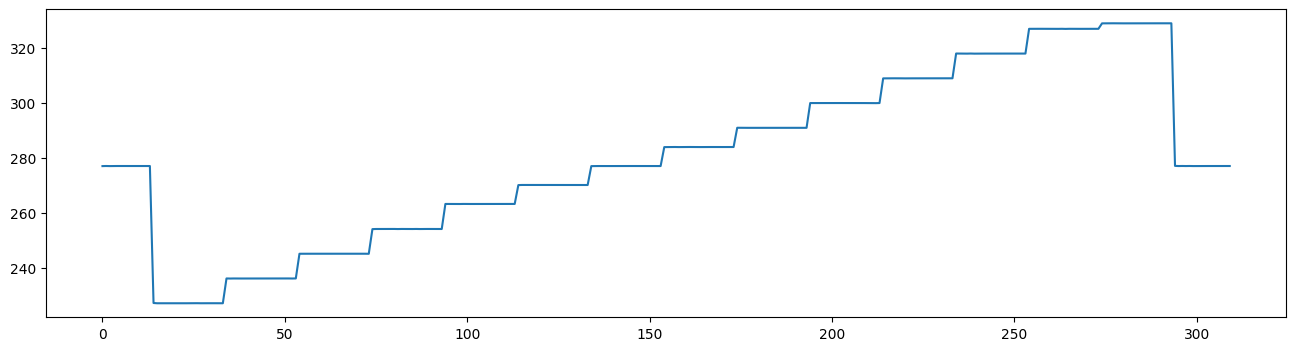

In [55]:
vs = dfa['V1'].to_numpy(dtype=float, copy=True)

plt.figure(figsize=(16,4))
plt.plot(vs)

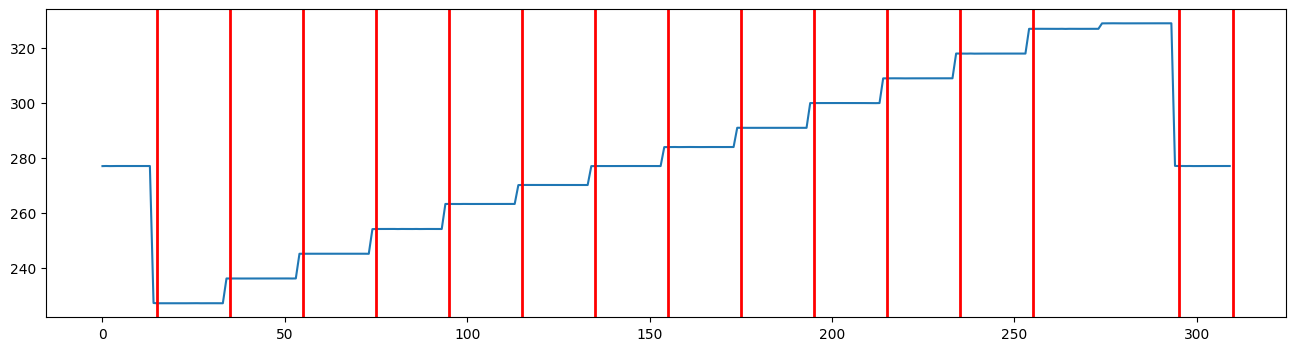

In [86]:
import ruptures as rpt

# Detect the change points
algo1 = rpt.Dynp(model="rbf").fit(vs)
change_location1 = algo1.predict(n_bkps=14)
algo2 = rpt.Pelt(model="rbf").fit(vs)
change_location2 = algo2.predict(pen=0.4)


# Point the change points:
def plot_change_points(ts,ts_change_loc):
    plt.figure(figsize=(16,4))
    plt.plot(ts)
    for x in ts_change_loc:
        plt.axvline(x,lw=2, color='red')

plot_change_points(vs,change_location1)

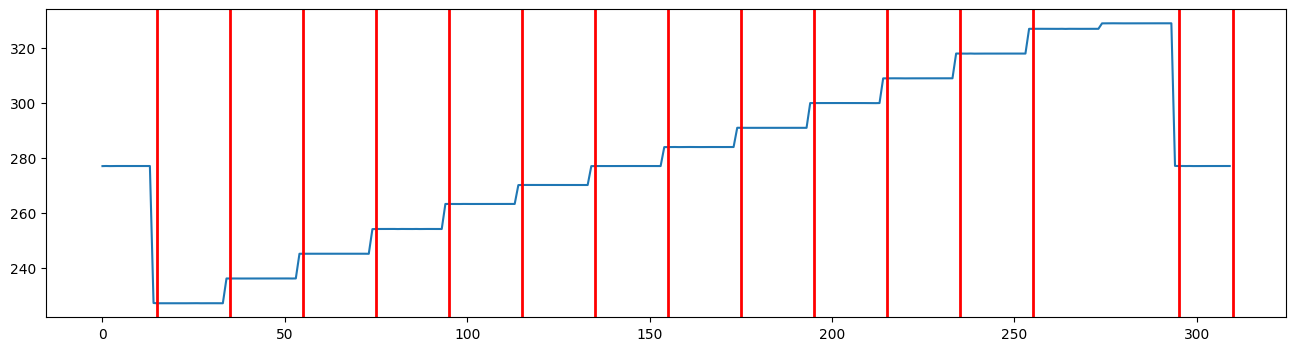

In [87]:
plot_change_points(vs,change_location2)

In [88]:
# bks = pd.Series(change_location1)
change_location1

[15, 35, 55, 75, 95, 115, 135, 155, 175, 195, 215, 235, 255, 295, 310]

In [99]:
vs

array([276.879, 276.918, 276.886, 276.915, 276.914, 276.911, 276.907,
       276.918, 276.901, 276.917, 276.907, 276.908, 276.906, 276.91 ,
       227.092, 226.999, 226.996, 227.002, 227.005, 226.994, 227.015,
       227.007, 227.013, 227.001, 227.013, 227.002, 227.025, 227.001,
       227.025, 227.011, 227.027, 227.011, 227.009, 227.002, 236.022,
       235.991, 236.015, 235.997, 236.001, 236.005, 236.002, 236.007,
       236.013, 236.008, 236.011, 236.023, 236.004, 236.023, 236.013,
       236.024, 236.009, 236.022, 236.002, 236.026, 245.004, 245.019,
       244.996, 245.01 , 245.004, 245.024, 245.007, 245.022, 245.008,
       245.013, 245.016, 245.023, 245.015, 245.013, 245.002, 245.011,
       245.014, 245.   , 245.014, 244.993, 253.961, 254.009, 254.014,
       254.01 , 254.018, 254.004, 254.023, 253.993, 254.02 , 254.006,
       254.008, 254.002, 254.021, 253.996, 254.017, 254.019, 254.011,
       254.015, 254.013, 254.008, 263.117, 263.109, 263.113, 263.11 ,
       263.097, 263.

In [104]:
def plataeus(idxs, data):
    plats = []
    for i in idxs:
        if i < len(data):
            plats.append(data[i])
    return plats
vi = plataeus(change_location1,vs)
print(type(vi))

<class 'list'>
